In [2]:
## LandFire Exploratory Anlaysis

In [58]:
import geopandas as gpd
import numpy as np

In [3]:
df = gpd.read_file("/home/jovyan/data-store/FCC24_Group_3/data/LF_Public_Events_1999_2022.gdb", 
                  layer= "CONUS_230_PublicModelReadyEvents")

In [5]:
df.head()

,Event_ID,LF_ID,DB_ID,DB_Source,Event_Type,Event_Subtype,Year,Start_Date,End_Date,Severity,Agency,Source_Code,FiscalYear,SHAPE_Length,SHAPE_Area,geometry
0,NW1000280180,2604,0206052040100002000,FACTS_SUID,Thinning,Precommercial Thin,2011.0,NaT,2011-10-28 00:00:00+00:00,Low,USFS,FS206FACTS03,NaN,2475.460425,141583.604848,"MULTIPOLYGON (((-844248.389 2068444.654, -8442..."
1,NW1000280181,2605,0206052040100021000,FACTS_SUID,Thinning,Precommercial Thin,2011.0,NaT,2011-10-28 00:00:00+00:00,Low,USFS,FS206FACTS03,NaN,767.148086,25391.624135,"MULTIPOLYGON (((-844738.979 2069094.769, -8447..."
2,NW1000280182,2674,020605STRAIN0039000,FACTS_SUID,Other Mechanical,Site Preparation for Natural Regeneration - Me...,2011.0,NaT,2011-09-09 00:00:00+00:00,High,USFS,FS206FACTS03,NaN,916.198592,48564.044514,"MULTIPOLYGON (((-838337.186 2063347.060, -8383..."
3,NW1000280184,2677,020609ESTRCGFF01000,FACTS_SUID,Prescribed Fire,Burning of Piled Material,2011.0,NaT,2011-01-17 00:00:00+00:00,Moderate,USFS,FS206FACTS03,NaN,1491.221957,49107.707014,"MULTIPOLYGON (((-761187.254 2195781.760, -7611..."
4,NW1000280223,2716,020609UPSGFRFF01000,FACTS_SUID,Other Mechanical,Thinning for Hazardous Fuels Reduction,2011.0,NaT,2011-06-12 00:00:00+00:00,Moderate,USFS,FS206FACTS03,NaN,3850.820337,177382.239931,"MULTIPOLYGON (((-778715.790 2175172.874, -7787..."


In [6]:
treatment_lst = ["Thinning", "Other Mechanical", "Perscribed Fire", "Mastication", "Clearcut"]

In [8]:
df_treatment_filter = df[df["Event_Type"].isin(treatment_lst)]

In [9]:
df_treatment_filter.to_file("/home/jovyan/data-store/FCC24_Group_3/data/LF_events_filtered.geojson", driver='GeoJSON'

,Event_ID,LF_ID,DB_ID,DB_Source,Event_Type,Event_Subtype,Year,Start_Date,End_Date,Severity,Agency,Source_Code,FiscalYear,SHAPE_Length,SHAPE_Area,geometry
0,NW1000280180,2604,0206052040100002000,FACTS_SUID,Thinning,Precommercial Thin,2011.0,NaT,2011-10-28 00:00:00+00:00,Low,USFS,FS206FACTS03,NaN,2475.460425,141583.604848,"MULTIPOLYGON (((-844248.389 2068444.654, -8442..."
1,NW1000280181,2605,0206052040100021000,FACTS_SUID,Thinning,Precommercial Thin,2011.0,NaT,2011-10-28 00:00:00+00:00,Low,USFS,FS206FACTS03,NaN,767.148086,25391.624135,"MULTIPOLYGON (((-844738.979 2069094.769, -8447..."
2,NW1000280182,2674,020605STRAIN0039000,FACTS_SUID,Other Mechanical,Site Preparation for Natural Regeneration - Me...,2011.0,NaT,2011-09-09 00:00:00+00:00,High,USFS,FS206FACTS03,NaN,916.198592,48564.044514,"MULTIPOLYGON (((-838337.186 2063347.060, -8383..."
4,NW1000280223,2716,020609UPSGFRFF01000,FACTS_SUID,Other Mechanical,Thinning for Hazardous Fuels Reduction,2011.0,NaT,2011-06-12 00:00:00+00:00,Moderate,USFS,FS206FACTS03,NaN,3850.820337,177382.239931,"MULTIPOLYGON (((-778715.790 2175172.874, -7787..."
57,SW1000189869,2569,020604GOULD00002000,FACTS_SUID,Clearcut,Stand Clearcut (EA/RH/FH),2011.0,NaT,2011-06-01 00:00:00+00:00,High,USFS,FS206FACTS03,NaN,890.083256,27506.730040,"MULTIPOLYGON (((-841250.168 1989241.172, -8412..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1128662,SE1000234789,9093,6320272,ACT_TRT_ID,Mastication,Mechanical - Mastication,2022.0,2022-02-16 00:00:00+00:00,2022-02-17 00:00:00+00:00,None,NPS,MNFPORSTRT07,2022.0,2592.933746,9437.662703,"MULTIPOLYGON (((158429.633 835840.806, 158431...."
1128663,SE1000234791,9095,6320272,ACT_TRT_ID,Mastication,Mechanical - Mastication,2022.0,2022-02-16 00:00:00+00:00,2022-02-17 00:00:00+00:00,None,NPS,MNFPORSTRT07,2022.0,1461.250760,5294.837170,"MULTIPOLYGON (((158918.699 836548.880, 158919...."
1128664,SE1000234792,9096,6320272,ACT_TRT_ID,Mastication,Mechanical - Mastication,2022.0,2022-02-16 00:00:00+00:00,2022-02-17 00:00:00+00:00,None,NPS,MNFPORSTRT07,2022.0,1403.517586,5059.963749,"MULTIPOLYGON (((158631.874 835907.636, 158625...."
1128665,SE1000234793,9097,6320272,ACT_TRT_ID,Mastication,Mechanical - Mastication,2022.0,2022-02-16 00:00:00+00:00,2022-02-17 00:00:00+00:00,None,NPS,MNFPORSTRT07,2022.0,685.291976,2412.921842,"MULTIPOLYGON (((158870.903 836728.245, 158870...."


In [24]:
fire_filter_lst = ["Wildfire", "Wildland fire"]

df_fire_filter = df[df["Event_Type"].isin(fire_filter_lst)]

In [28]:
df_fire_filter.to_file("/home/jovyan/data-store/data/iplant/home/shared/earthlab/forest_carbon_codefest/Team_outputs/Team3/LF_fire_filtered.geojson", driver='GeoJSON')

In [30]:
df_treatment_filter.to_file("/home/jovyan/data-store/data/iplant/home/shared/earthlab/forest_carbon_codefest/Team_outputs/Team3/LF_treatment_filtered.geojson", driver='GeoJSON')

## Clip to Study Area + Do Exploratory Analysis

In [33]:
co_bounds = gpd.read_file("/home/jovyan/data-store/FCC24_Group_3/data/Colorado_State_Boundary.geojson")

In [34]:
co_bounds

,OBJECTID,NAME,geometry
0,1,Colorado,"POLYGON ((-107.31780 41.00293, -107.31951 41.0..."


<Axes: >

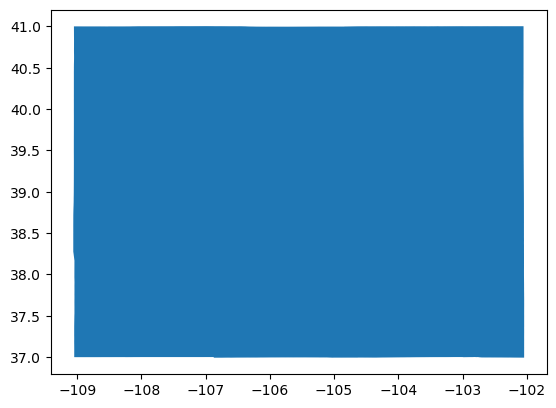

In [36]:
co_bounds.plot()

In [37]:
df_fire_filter.crs

<Projected CRS: EPSG:5070>
Name: NAD83 / Conus Albers
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: United States (USA) - CONUS onshore - Alabama; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming.
- bounds: (-124.79, 24.41, -66.91, 49.38)
Coordinate Operation:
- name: Conus Albers
- method: Albers Equal Area
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [38]:
df_fire_filters_reproject = df_fire_filter.to_crs("EPSG:4326")

In [40]:
df_fire_filters_reproject.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [41]:
df_fire_filters_reproject_clip = df_fire_filters_reproject.clip(co_bounds)

In [43]:
df_fire_filters_reproject_clip.shape

(2654, 16)

<Axes: >

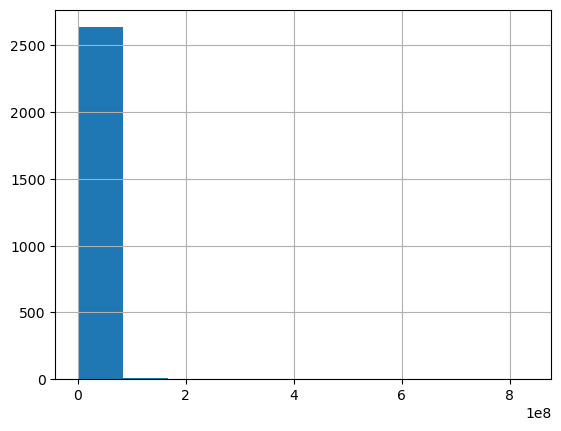

In [52]:
df_fire_filters_reproject_clip['SHAPE_Area'].hist(bins=20)

In [54]:
df_fire_filters_reproject_clip['SHAPE_Area'].mean()

3121869.6231783745

In [55]:
df_fire_filters_reproject_clip['SHAPE_Area'].median()

4807.796941483317

In [56]:
df_fire_filters_reproject_clip['SHAPE_Area'].min()

81.38830745796076

In [59]:
np.percentile(df_fire_filters_reproject_clip['SHAPE_Area'], 25)

899.7521635064074

In [60]:
df_fire_filters_reproject_clip['SHAPE_Area'].describe()

count    2.654000e+03
mean     3.121870e+06
std      3.206213e+07
min      8.138831e+01
25%      8.997522e+02
50%      4.807797e+03
75%      9.130354e+04
max      8.348646e+08
Name: SHAPE_Area, dtype: float64

In [61]:
df_fire_filters_reproject_clip['area_acres'] = df_fire_filters_reproject_clip['SHAPE_Area']/4047

In [62]:
df_fire_filters_reproject_clip['area_acres'].describe()

count      2654.000000
mean        771.403416
std        7922.444046
min           0.020111
25%           0.222326
50%           1.187990
75%          22.560795
max      206292.222525
Name: area_acres, dtype: float64

In [65]:
df_fire_size_filter = df_fire_filters_reproject_clip[df_fire_filters_reproject_clip['area_acres'] > 50]

In [66]:
df_fire_size_filter.shape

(517, 17)

In [67]:
df_fire_size_filter['area_acres'].describe()

count       517.000000
mean       3939.981787
std       17612.830762
min          50.000259
25%         106.433211
50%         326.652643
75%        1136.152353
max      206292.222525
Name: area_acres, dtype: float64

In [69]:
df_fire_size_filter.to_file('/home/jovyan/data-store/data/iplant/home/shared/earthlab/forest_carbon_codefest/Team_outputs/Team3/LF_fire_CO_50ac_above.geojson', driver='GeoJSON')

In [ ]:
# Filter Fuel Treatments by size and clip to CO boundary

In [78]:
df_treatment_filter.head()

,index,Event_ID,LF_ID,DB_ID,DB_Source,Event_Type,Event_Subtype,Year,Start_Date,End_Date,Severity,Agency,Source_Code,FiscalYear,SHAPE_Length,SHAPE_Area,geometry
0,0,NW1000280180,2604,0206052040100002000,FACTS_SUID,Thinning,Precommercial Thin,2011.0,NaT,2011-10-28 00:00:00+00:00,Low,USFS,FS206FACTS03,NaN,2475.460425,141583.604848,"MULTIPOLYGON (((-844248.389 2068444.654, -8442..."
1,1,NW1000280181,2605,0206052040100021000,FACTS_SUID,Thinning,Precommercial Thin,2011.0,NaT,2011-10-28 00:00:00+00:00,Low,USFS,FS206FACTS03,NaN,767.148086,25391.624135,"MULTIPOLYGON (((-844738.979 2069094.769, -8447..."
2,2,NW1000280182,2674,020605STRAIN0039000,FACTS_SUID,Other Mechanical,Site Preparation for Natural Regeneration - Me...,2011.0,NaT,2011-09-09 00:00:00+00:00,High,USFS,FS206FACTS03,NaN,916.198592,48564.044514,"MULTIPOLYGON (((-838337.186 2063347.060, -8383..."
3,4,NW1000280223,2716,020609UPSGFRFF01000,FACTS_SUID,Other Mechanical,Thinning for Hazardous Fuels Reduction,2011.0,NaT,2011-06-12 00:00:00+00:00,Moderate,USFS,FS206FACTS03,NaN,3850.820337,177382.239931,"MULTIPOLYGON (((-778715.790 2175172.874, -7787..."
4,57,SW1000189869,2569,020604GOULD00002000,FACTS_SUID,Clearcut,Stand Clearcut (EA/RH/FH),2011.0,NaT,2011-06-01 00:00:00+00:00,High,USFS,FS206FACTS03,NaN,890.083256,27506.730040,"MULTIPOLYGON (((-841250.168 1989241.172, -8412..."


In [79]:
def clip_and_filter(df: gpd.GeoDataFrame, boundary: gpd.GeoDataFrame, ac_area_min: int) -> gpd.GeoDataFrame:

    df = df.to_crs("EPSG:4326")
    df_clipped = df.clip(boundary) 

    # add area_acres_column 
    df_clipped['area_acres'] =  df_clipped['SHAPE_Area']/ 4047
    
    
    df_clipped_filtered = df_clipped[df_clipped['area_acres'] > ac_area_min]

    return df_clipped_filtered

In [80]:
df_fuel_treatment_clipped = clip_and_filter(df = df_treatment_filter, boundary = co_bounds, ac_area_min = 40)

In [81]:
df_fuel_treatment_clipped.shape

(2703, 18)

In [83]:
df_fuel_treatment_clipped['area_acres'].describe()

count     2703.000000
mean       300.124966
std       1352.791766
min         40.001087
25%         57.074157
50%         89.703973
75%        161.850541
max      40017.862060
Name: area_acres, dtype: float64

<Axes: >

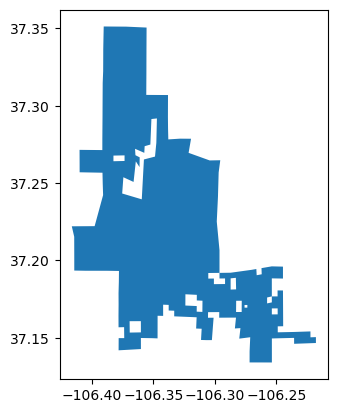

In [86]:
df_fuel_treatment_clipped[df_fuel_treatment_clipped['area_acres'] > 40000].plot()

In [87]:
df_fuel_treatment_clipped[df_fuel_treatment_clipped['area_acres'] > 40000].to_file("/home/jovyan/data-store/FCC24_Group_3/data/large_fuel_treatment_instance.geojson", driver='GeoJSON')

In [88]:
df_fuel_treatment_clipped[df_fuel_treatment_clipped['area_acres'] > 40000]

,index,Event_ID,LF_ID,DB_ID,DB_Source,Event_Type,Event_Subtype,Year,Start_Date,End_Date,Severity,Agency,Source_Code,FiscalYear,SHAPE_Length,SHAPE_Area,geometry,area_acres
257310,614075,SW1000489011,2562,None,None,Thinning,Thinning,2017.0,NaT,NaT,None,State,MNMFWRI00001,NaN,144430.873193,1.619523e+08,"POLYGON ((-106.29362 37.19199, -106.29333 37.1...",40017.86206


In [89]:
df_fuel_treatment_clipped_max = df_fuel_treatment_clipped[df_fuel_treatment_clipped['area_acres'] < 10000]

In [90]:
df_fuel_treatment_clipped_max.shape

(2694, 18)

In [93]:
df_fuel_treatment_clipped_max['area_acres'].describe()

count    2694.000000
mean      237.408557
std       646.175687
min        40.001087
25%        57.019081
50%        89.540737
75%       160.925589
max      9265.284637
Name: area_acres, dtype: float64

In [96]:
df_fuel_treatment_clipped[df_fuel_treatment_clipped['area_acres']  > 10000].to_file("/home/jovyan/data-store/FCC24_Group_3/data/1000ac_fuel_treatment_instance.geojson")

In [98]:
df_fuel_treatment_clipped.to_file("/home/jovyan/data-store/data/iplant/home/shared/earthlab/forest_carbon_codefest/Team_outputs/Team3/LF_treatment_CO_40ac_above.geojson", driver='GeoJSON')